In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define columns for the dataset
columns = ['Age','Workclass','fnlgwt','Education','EdNum','MaritalStatus',
           'Occupation','Relationship','Race','Sex','CapitalGain',
           'CapitalLoss','HoursPerWeek','Country','Income']

# Load the training and test datasets
df_train_set = pd.read_csv('dataset/adult.data', names=columns)
df_test_set = pd.read_csv('dataset/adult.test', names=columns, skiprows=1)

# Combine the train and test datasets
df_combined = pd.concat([df_train_set, df_test_set], ignore_index=True)

# Initial data cleaning
# Removing leading/trailing whitespaces in string columns
df_combined = df_combined.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Fixing the Income column in test set which has a period at the end
df_combined['Income'] = df_combined['Income'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)
# Removing samples with missing values (annotated by "?") from the combined dataset
df_combined = df_combined.replace('?', pd.NA).dropna()

df_combined.head()

,Age,Workclass,fnlgwt,Education,EdNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


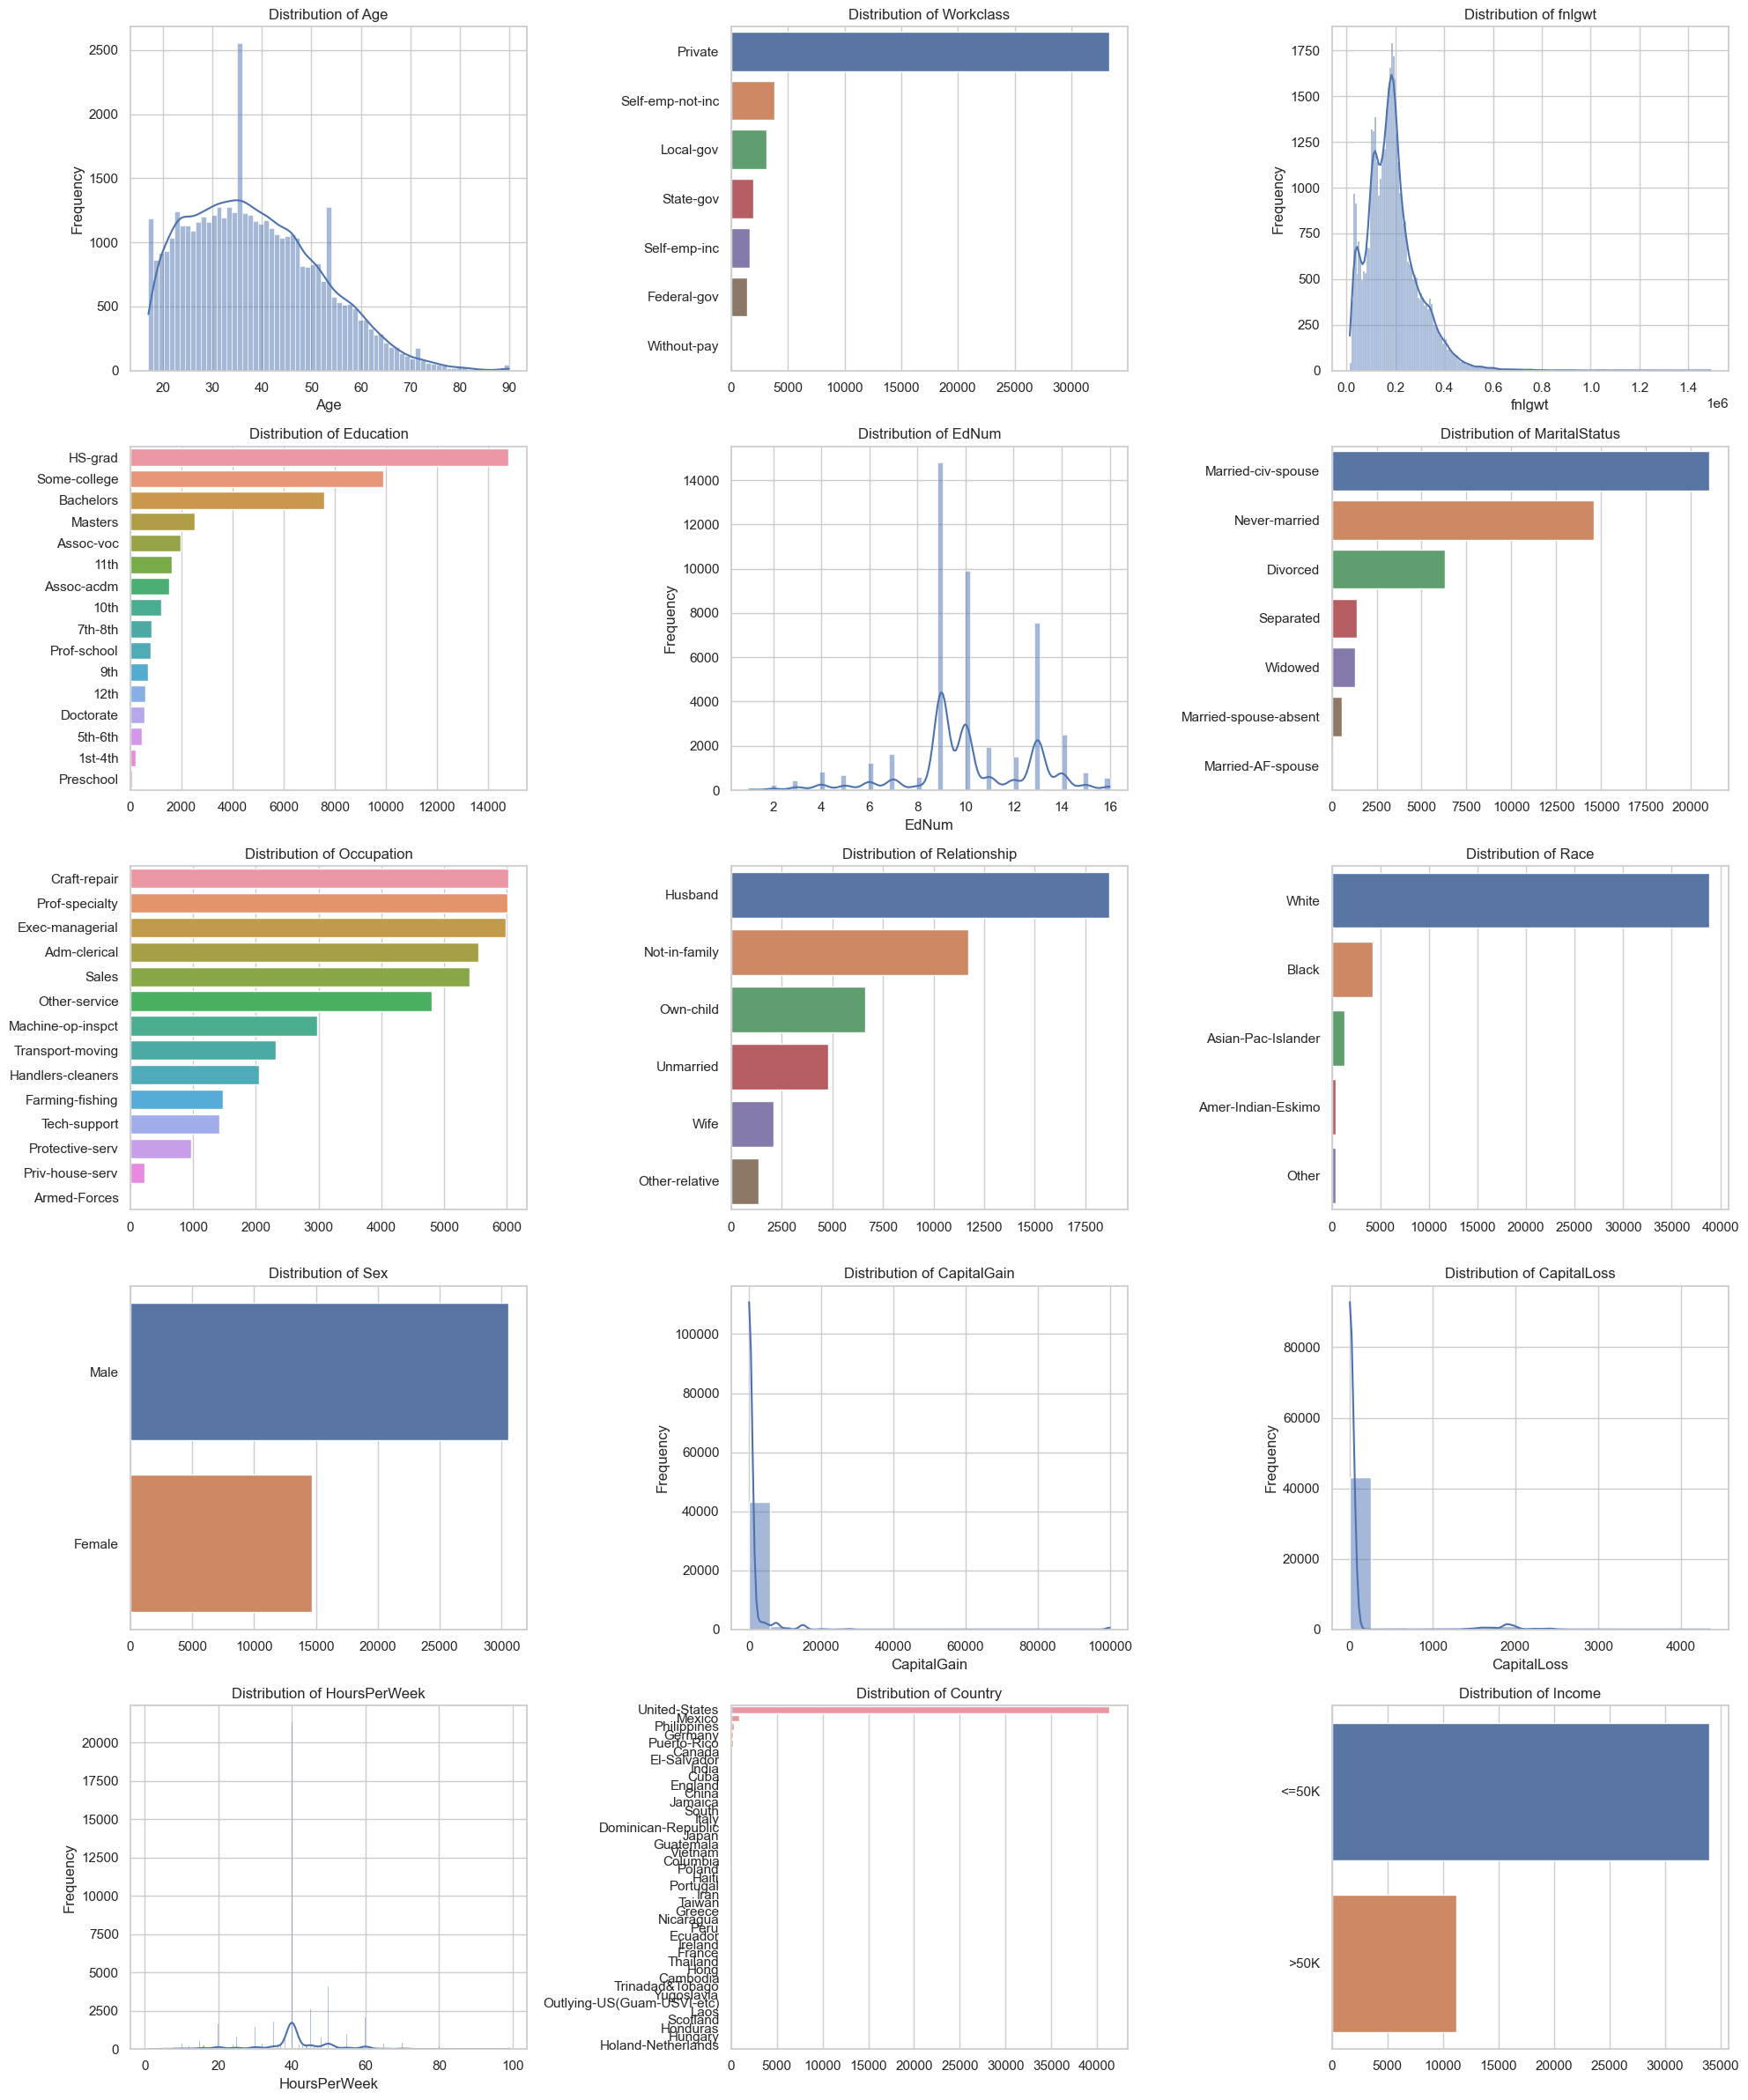

In [2]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Selecting a subset of variables for visualization due to large number of variables
variables_to_plot = ['Age','Workclass','fnlgwt','Education','EdNum','MaritalStatus',
           'Occupation','Relationship','Race','Sex','CapitalGain',
           'CapitalLoss','HoursPerWeek','Country','Income']

# Plotting distributions and counts for selected variables
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 24))
axes = axes.flatten() # Flatten to 1D array for easy iteration

for i, var in enumerate(variables_to_plot):
    if df_combined[var].dtype == 'object' or var == 'Income': # Categorical or the response variable
        sns.countplot(y=var, data=df_combined, ax=axes[i], order = df_combined[var].value_counts().index)
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    else: # Continuous variable
        sns.histplot(df_combined[var], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [3]:
# Defining thresholds based on the verified one-to-one relationship
# Less than High School: EdNum < 9
# High School Graduate (including some college but not a degree): 9 <= EdNum < 13
# Higher Education (Bachelor's degree or higher): EdNum >= 13

subset_higher_ed_ednum = df_combined[df_combined['EdNum'] >= 13]
subset_some_college_ednum = df_combined[(df_combined['EdNum'] >= 9) & (df_combined['EdNum'] < 13)]
subset_less_than_hs_ednum = df_combined[df_combined['EdNum'] < 9]
'''
# Dropping the 'EducationLevel' column from subsets to maintain original structure
subset_higher_ed_ednum = subset_higher_ed_ednum.drop(columns=['Education'])
subset_some_college_ednum = subset_some_college_ednum.drop(columns=['Education'])
subset_less_than_hs_ednum = subset_less_than_hs_ednum.drop(columns=['Education'])

subset_higher_ed_ednum = subset_higher_ed_ednum.drop(columns=['EdNum'])
subset_some_college_ednum = subset_some_college_ednum.drop(columns=['EdNum'])
subset_less_than_hs_ednum = subset_less_than_hs_ednum.drop(columns=['EdNum'])
'''
# Exporting subsets to CSV files based on EdNum
subset_higher_ed_ednum.to_csv('dataset/subset_higher_ed_ednum.csv', index=False)
subset_some_college_ednum.to_csv('dataset/subset_some_college_ednum.csv', index=False)
subset_less_than_hs_ednum.to_csv('dataset/subset_less_than_hs_ednum.csv', index=False)